# Chapter 03 -- Data Types and Formatting

## Topics Covered:

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2003%20%20--%20Data%20Types%20and%20Formatting.ipynb#Numerics">Numerics </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2003%20%20--%20Data%20Types%20and%20Formatting.ipynb#Boolean">Boolean </a>    

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2003%20%20--%20Data%20Types%20and%20Formatting.ipynb#Strings">Strings </a>  
 
<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2003%20%20--%20Data%20Types%20and%20Formatting.ipynb#Numerical-precision">Numerical Precision</a>    
   
<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2003%20%20--%20Data%20Types%20and%20Formatting.ipynb#String-Slicing">String Slicing </a>
    
<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2003%20%20--%20Data%20Types%20and%20Formatting.ipynb#String-Formatting">String Formatting </a>   

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2003%20%20--%20Data%20Types%20and%20Formatting.ipynb#Resources">Resources </a>    



Generally, SAS programmers have not had to concern themselves with data types since the model for SAS is simple.  Data types are either numeric (8.) or character ($).  SAS informats (both SAS-supplied and user-defined) provide the mappings for reading  data types.  Similarly, SAS formats provide the mappings needed to write various data types.  Internally, SAS uses floating point representation, with all of the details handled under the covers.

Python has three distinct numeric types.  They are:
````
     Integers
     Floating point numbers
     Complex numbers
````    
    
Python Numeric types and their supported operations are described <a href="https://docs.python.org/3/library/stdtypes.html#numeric-types-int-float-complex">
here.</a>  Neither SAS nor Python have requirements to declare data types.  They are inferred by usage context.  In addition, Python has a Boolean type which is a sub-type of integer.  Complex numbers are not discussed here.

## Numerics

Below, x is an integer. y is a float

Mathematical operations involving integers and floats produces a float.  The type() method returns an object's type.  Use the type() method to determine which object type is returned.

In [1]:
x = 1
y = 1.5
z = x*y

print('x is:', type(x))
print('y is:', type(y))
print('z is:', z, 'with type:', type(z))

x is: <class 'int'>
y is: <class 'float'>
z is: 1.5 with type: <class 'float'>


In the program below, the SAS variables `x`, `y`, and `z` are numeric.  This example creates a temporary data set called “types”, which is searched within the dictionary tables (sashelp.vcolumn) to find the ‘type’ associated with these variables.

```
    /******************************************************/
    /* c03_x_is_int_y_is_float.sas                        */
    /******************************************************/
    4          data types;
    5             x = 1;
    6             y = 1.5;
    7             z = x*y;
    8         
    9             Put "x is: " x /
    10                "y is: " y/
    11                "z is: " z;
    12        
    13 title "SAS Reported 'type' for numeric variables";

    x is: 1
    y is: 1.5
    z is: 1.5
    
    14 proc print data=sashelp.vcolumn(where=(libname='WORK' and
    15                                 memname='TYPES'));
    16            id name;
    17            var type;
```

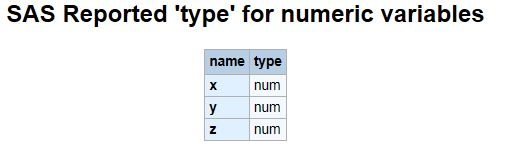

In [2]:
from IPython.display import Image
Image(filename='Anaconda3\\output\\sas data types.JPG')

## Boolean 

Because of its utility in data cleansing and transformations we will cover this in detail. The Python boolean comparison operators are found
<a href="https://docs.python.org/3/library/stdtypes.html#comparisons">
here.</a>

The two Boolean values are True and False with the capitalization as shown.  In numeric contexts (for example, when used as an argument to an arithmetic operator), they behave like the integers with values 0 and 1, respectively.

SAS does not have a boolean data type, so Data Step code is often constructed as a series of cascading IF-THEN/DO code blocks for testing True/False.  

SAS does have implied boolean test operators.  An example is the END=<variable> option on the SET statement.  It is initialized to 0 and set to 1 when the last observation in a data set is read. PROC SQL uses implied 

In [3]:
print(type(True))
print(bool(True))

<class 'bool'>
True


Empty sets return False, Non-empty sets return True

In [4]:
print(bool(''))                  
print(bool('Arbitrary String'))  

False
True


Boolean values for 0 and 1

In [5]:
print(bool(0))
print (bool(1))

False
True


Inequality comparison

In [6]:
x = 2
y = 3
x != y

True

````
    /******************************************************/
    /* c03_inequality_comparison.sas                      */
    /******************************************************/
    4         data _null_;
    5         /* inequality comparison */
    6         x = 2;
    7         y = 3;
    8         
    9         if x ^= y then
    10           put 'True';
    11        else put 'False';
    
    True

````

String equality comparison.  Note the case for the first letter in each string.

In [7]:
s1 = 'String'
s2 = 'string'
s1 == s2

False

SAS example for string equality test.

````
    /******************************************************/
    /* c03_string_equality_comparison.sas                 */
    /******************************************************/
    17        data _null_;
    18        
    19        /* string equality comparison */
    20        s1 = 'String';
    21        s2 = 'string';
    22        
    23        if s1 = s2 then
    24           put 'True';
    25        else put 'False';

    False

````

in comparison with  the boolean 'and' operator

In [8]:
s3 = 'Longer String'
'r' and "" in  s3

True

SAS example with boolean 'and' operator.  The SAS function FINDC is documented <a href="http://support.sas.com/documentation/cdl/en/lrdict/64316/HTML/default/viewer.htm#a002264923.htm">here</a>.

````
    /******************************************************/
    /* c03_in_comparison_with_and_operator.sas            */
    /******************************************************/
    31        data _null_;
    32        
    33        /* equivalent for in comparison with 'and' operator */
    34        s3 = 'Longer String';
    35        
    36        if findc(s3,'r') ^= 0 and findc(s3,' ') ^= 0 then
    37           put 'True';
    38        else put 'False';
    39        run;

True

````

in comparison with boolean 'or' operator

In [9]:
s4 = 'Skinny'
s5 = 'hungry'
'y' in  s4 or s5

True

The SAS program below is another illustration of implied boolean logic.  The FINDC function searches a string for the first occurrence of the specified characters, and returns the position of the first character found.  It returns 0 if the characters are not found--effectively returning 'false'.

````
    /******************************************************/
    /* c03_findc_function.sas                             */
    /******************************************************/
    45        data _null_;
    46        
    47        /* Equivalent in comparison with 'or operator */
    48        s4 = 'Skinny';
    49        s5 = 'hungry';
    50        
    51        if findc(s4,'y') ^= 0 or findc(s5,'y') ^= 0 then
    52                  put 'True';
    53                else put 'False';

    True
    
````

is operator

In [10]:
x1 = 4
type(x1) is int and x1 <= 5

True

It is a mathematical truth that .1 multiplied by 10 produces 1 (for base10 of course).  Read the numerical precision section below to understand why the boolean equality test below returns False.

In [11]:
x =  [.1] * 10
x == 1

False

## Numerical Precision 

Consider the issue of numerical precision and the use of the round() method below.  This example does a boolean comparison between the product of (.1 * 10) and the integer value of 1. Due to how floats are represented internally the comparison is False.  Using the round() method for the product makes the comparison true (assuming that is what you want to have happen).

In [12]:
one = 1
total = 0

list = [.1] * 10           # List a data structure containing an ordered set of objects

for i in list:
      total += i
print('Boolean expression one == total evaluates to:', one == total)    
print('Boolean expression one == round(total) evaluates to:', one == round(total))
print('Total is:', total, 'and type is:', type(total))

Boolean expression one == total evaluates to: False
Boolean expression one == round(total) evaluates to: True
Total is: 0.9999999999999999 and type is: <class 'float'>


For a detailed explanation as to why, details are found <a href="https://docs.python.org/3.6/tutorial/floatingpoint.html">
here.</a>  The explanation applies to both Python and SAS.

SAS produces the same results as the Python example above.  Without the ROUND function the comparison of the product (.1 * 10) and the integer value 1 evaluates 'False'.  Applying the ROUND function to the accumulator variable 'total' evaluates the comparison 'True'. 


````
    /******************************************************/
    /* c03_numerical_precision.sas                        */
    /******************************************************/
    4         data _null_;
    5         one = 1;
    6         total = 0;
    7         inc = .1;
    8         
    9         do i = 1 to 10;
    10          total + inc;
    11          put inc ', ' @@;
    12        end;
    13        
    14        put;
    15           if total = one then put 'True';
    16               else put 'Comparison of "one = total" evaluates to False';
    17        
    18           if round(total) = one then put 'Comparison of "one = round(total)" evaluates to Tru
    18      ! e';
    19              else put 'False';
    20        
    21           put 'Total is: ' total 8.3;

    0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 
    Comparison of "one = total" evaluates to False
    Comparison of "one = round(total)" evaluates to True
    Total is:    1.000
````

## Strings

Strings can be enclosed in single quotes (') or double quotes (").  In Python strings are a sequence of Unicode characters.  Strings are immutable, so string methods() only return a new sequence. And because everything in Python is an object, we can use the form object.method() to apply a given method to these objects.  These include built-in formatting.

String literal assignment and concatenation

In [13]:
s5 = 'Hello'
s6 = "World"

print(s5, s6)
print(s5+s6) 
print('Type() for s5 is:', type(s5))

Hello World
HelloWorld
Type() for s5 is: <class 'str'>


SAS analog example for string literal assignment and concatentation.

````
    /******************************************************/
    /* c03_string_literal_assignment_concatentation.sas   */
    /******************************************************/
    4         data _null_;
    5         s5 = 'Hello';
    6         s6 = 'World';
    7         
    8         put s5 s6;
    9         concat = cat(s5, s6);
    10        
    11        put concat;

    Hello World
    HelloWorld
````

The len() method finds the length of the concatenated string literals.

In [14]:
len(s5) + len(s6)

10

The SAS analog to finding the length of the concatenate string literals.

````
    /******************************************************/
    /* c03_find_len_concatenated_string.sas               */
    /******************************************************/
    4         data _null_;
    5         s5 = 'Hello';
    6         s6 = 'World';
    7         
    8         len = length(cat(s5, s6));
    9         
    10        put len;

    10
````

The upper() method applied to a string object

In [15]:
print(s5 + " " + s6.upper())

Hello WORLD


The SAS analog example using the UPCASE function documented <a href="http://support.sas.com/documentation/cdl/en/lrdict/64316/HTML/default/viewer.htm#a000245965.htm">here</a>.

````
    /******************************************************/
    /* c03_upper_method_on_string.sas                     */
    /******************************************************/
    4         data _null_;
    5         s5 = 'Hello';
    6         s6 = 'World';
    7         
    8         upcase = cat(s5, ' ', upcase(s6));
    9         
    10        put upcase;

    Hello WORLD
````

Python's help is quite extensive.

In [16]:
dir(str) 

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

Python also supports a multi-line string literal that preserves spacing.  It is also used to display help topics.

In [17]:
s7 = '''Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts, and so on.'''

print(s7)

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts, and so on.


The count method() 

In [18]:
print('Occurances of the letter "c":', s7.count('c'))

Occurances of the letter "c": 6


A contrast between SAS and Python is how Python preserves the line terminations for the string literals or DocStrings.  SAS removes the line termination characters such that a PUT statement renders a single line wrapped to the width of the SAS log.

````
    /******************************************************/
    /* c03_count_occurences_of_letter_c.sas               */
    /******************************************************/
    5         data _null_;
    6         s7 =
    7         'Beautiful is better than ugly.
    8         Explicit is better than implicit.
    9         Simple is better than complex.
    10        Complex is better than complicated.
    11        Flat is better than nested.
    12        Sparse is better than dense.
    13        Readability counts, and so on.';
    14        
    15        count = countc(s7,'c');
    16        
    17        put 'Occurances of the letter "c": ' count;

    Occurances of the letter "c": 6
````

## String Slicing

Python uses indexing methods on a number of different objects having similar behaviors depending on the object.  With a sequence of characters (string) Python automatically creates an index with a start position of zero (0) and increments to an end position of the string's length -1. The index can be thought of as one-dimensional array.

At times, you may find it easier to refer to characters toward the end of the string.  Python provides an 'end-to-beginning' indexer with a start position of -1 for the last character in the string and decrements to the beginning position.   

<table border="1">
  <tr>
    <td> Character <td>
    <td> H </td>
    <td> e </td>
    <td> l </td>
    <td> l </td>
    <td> o </td>
    <td>   </td>
    <td> W </td>
    <td> o </td>
    <td> r </td>
    <td> l </td>
    <td> d </td>
  </tr>
  <tr>
    <td> Index <td>
    <td> 0 </td>
    <td> 1 </td>
    <td> 2 </td>
    <td> 3 </td>
    <td> 4 </td>
    <td> 5 </td>
    <td> 6 </td>
    <td> 7 </td>
    <td> 8 </td>
    <td> 9 </td>
    <td> 10 </td>
  </tr>
    <td> Index Value R to L <td>
    <td> -11 </td>
    <td> -10 </td>
    <td> -9 </td>
    <td> -8 </td>
    <td> -7 </td>
    <td> -6 </td>
    <td> -5 </td>
    <td> -4 </td>
    <td> -3 </td>
    <td> -2 </td>
    <td> -1 </td>
  </tr>
</table>



String slicing with index at 0

In [19]:
s = 'Hello World'
s[0]

'H'

The SAS analog example uses the SUBSTR (right of =) function documented <a href="http://support.sas.com/documentation/cdl/en/lrdict/64316/HTML/default/viewer.htm#a000212264.htm">here</a>.

````
    /******************************************************/
    /* c03_slicing_with_index_at_zero.sas                 */
    /******************************************************/
    4         data _null_;
    5         s = 'Hello World';
    6         
    7         extract = substr(s, 1, 1);
    8         
    9         put extract;

    H
````

No start position provide implies the start position of 0

In [20]:
s[:5]

'Hello'

Start at position 3 and go to the last character.  Notice how the this range is not inclusive.

In [21]:
s[3:-1]

'lo Worl'

Start from the end of the string and read to the left.

In [22]:
s[-11]

'H'

The partition() method uses a separator, in our example, a whitespace and returns a 3 part tuple.  0 for the part before the separator, 1 for the separator itself, and 2 for part after the separator.

In [23]:
if s7.startswith('Bea'):
    print(s7.partition(' ')[0])

Beautiful


The SAS analog example uses the SUBSTR and the SCAN function, documented <a href="http://support.sas.com/documentation/cdl/en/lrdict/64316/HTML/default/viewer.htm#a000214639.htm">here</a>.

````
    /******************************************************/
    /* c03_startswith_partition.sas                       */
    /******************************************************/
    23        data _null_;
    24        
    25        s7='Beautiful is better than ugly.
    26        Explicit is better than implicit.
    27        Simple is better than complex.
    28        Complex is better than complicated.
    29        Flat is better than nested.
    30        Sparse is better than dense.
    31        Readability counts, and so on.';
    32        
    33        if substr(s7, 1, 3) = 'Bea' then
    34           found= scan(s7, 1, ' ');
    35        
    36        put found;

    Beautiful
````

Backslashes (\\) are used as string literal escape characters.  The Python interpreter ignores the character follwing the backslash.

In [24]:
q = 'Python\'s capabilities'
print(q)

Python's capabilities


## String Formatting

A format string contains one or more format codes in fields (which are replaced) within string constants. These fields to be replaced are surrounded by curly braces {}.  There are two types of arguments to the .format() method. They are positional and keyword arguments.

If the positional parameters are used in the order in which they are written, the argument specifiers inside of the braces can be omitted.  Thus, '{} {} {}' corresponds to '{0} {1} {2}'. But they are needed if you want to access them in different orders: e.g. '{2} {1} {0}'.  

The Python documentation is located <a href="https://docs.python.org/3/library/string.html#string-formatting"> here.</a> 

Python's formatting interface has undergone significant changes between version 2 and version 3.  In  older versions the syntax is **format % values** where **format** is a string, and **%** conversion specifications in format are replaced with elements of values.  Our examples will use the newer style syntax.

Python has a rich set of formatting capabilities which we only touch upon here.  Our goal is to get enough exposure to be able to get to the task of analyzing and understanding data.  In subsequent chapters, we will see additional examples

#### *Strings*

Python is a language that is undergoing continued development.  Prior to Python 3.x, string formatting used percent symbol (%) as a means for designating string arguments.  This older-style syntax is preserved for backward compatibility reasons.  

The old-style syntax is not used here.

In [25]:
"First argument: %s, second argument: %s" % ('Python', 'Formatting')

'First argument: Python, second argument: Formatting'

Left-alignment, field width 30

In [26]:
'Example of: {:<30}'.format("left aligned, width is 30")

'Example of: left aligned, width is 30     '

Right-alignment, field width 40

In [27]:
'Example of: {:>40}'.format("right aligned, width is 40")

'Example of:               right aligned, width is 40'

Centered and filled

In [28]:
'Example of: {:*^40}'.format('centered and fill characters') 

'Example of: ******centered and fill characters******'

#### *Integers*

Newer-style syntax with arguments displayed in the order they appear in the list

In [29]:
"First argument: {}, second argument: {}".format(20, 16)

'First argument: 20, second argument: 16'

Arguments displayed in an order different than the way they appear in the list

In [30]:
"Second Argument: {1}, first argument {0}".format(20, 16)

'Second Argument: 16, first argument 20'

Converting values to different bases. 

In [31]:
 "int: {0:d};  hex: {0:x};  oct: {0:o};  bin: {0:b}".format(99)

'int: 99;  hex: 63;  oct: 143;  bin: 1100011'

The SAS analog for converting values to different bases.

````
    /******************************************************/
    /* c03_convert_values_to_different_base.sas           */
    /******************************************************/
    4         data _null_;
    5         input int 8.;
    6         put 'int: ' int 8. ' hex: ' int hex2. ' octal: ' int octal. ' binary: ' int binary8.;
    7         put 'Original input: ' _infile_;
    8         datalines;

    int:       99 hex: 63 octal: 143 binary: 01100011
    Original input: 99 
````

Formatting to handle ints

In [32]:
'Integer 99 displayed as {:d}'.format(99)

'Integer 99 displayed as 99'

Controlling field width for integers

In [33]:
'Integer 99 displayed as {:04d}'.format(99)

'Integer 99 displayed as 0099'

````
    /******************************************************/
    /* c03_formatting_to_handle_ints.sas                  */
    /******************************************************/
    4         data _null_;
    5         input int 8.;
    6         
    7         /* display_int is a character variable */
    8         display_int = put(int,z4.);
    9         put 'int: ' display_int;
    10        
    11        put 'Original input: ' _infile_;
    12        datalines;

    int: 0099
    Original input: 99
````

By default, only negative numbers are prefixed with a sign

In [34]:
'{:=+3d}'.format((+99))

'+99'

SAS users are familiar with user-written formats.  The example displayed below uses a <a href="http://support.sas.com/documentation/cdl/en/proc/61895/HTML/default/viewer.htm#a002473483.htm">PICTURE</a> statement with PROC FORMAT in order to a numeric preceeded by a plus-sign.

````
    /******************************************************/
    /* c03_postive_numbers_are_signed.sas                 */
    /******************************************************/
    4         /* Method without converting int to a character string */
    5         proc format;
    6         picture plussign
    7                 low - high = '  00' (prefix='+');
    8         
    9         data _null_;
    10        input int 8.;
    11        
    12        put 'int: ' int plussign.;
    13        put 'Original input: ' _infile_;

    int:  +99
    Original input: 99
````

#### *Floats*

Formatting to handle floats

In [35]:
"precision: {0:.1f} or {0:.4f}".format(3.14159265)

'precision: 3.1 or 3.1416'

Analog SAS program used to control numeric formatting.

````
    /******************************************************/
    /* c03_control_numeric_formatting.sas                 */
    /******************************************************/
    4         data _null_;
    5         pi = 3.14159265;
    6         
    7         put 'precision: ' pi 8.1 ' or ' pi 8.4;

    precision:      3.1 or   3.1416
````

Percentage format

In [36]:
"6.33 as Percentage of 150: {0:6.2%}".format(6.33/150)

'6.33 as Percentage of 150:  4.22%'

````
    /******************************************************/
    /* c03_percentage_format.sas                          */
    /******************************************************/
    4         data _null_;
    5         pct = 6.33 / 150;
    6         
    7         put '6.33 as a percentage of 150: ' pct percent8.2;

    6.33 as a percentage of 150:   4.22% 
````

#### Datetime

Python permits the manipulations of dates and times.  In these examples the date, datetime, and time objects use the strftime(format) method to create strings illustrating datetime extracts and formatting.  <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2008%20--%20Date%2C%20Time%2C%20and%20%20Timedelta%20Objects.ipynbChapter">Chapter 08 -- Date, Time, and Timedelta Objects</a> illustrates additional datetime arithmetic examples and durations calculations.  The Python directives for datetime formatting are found <a href="https://docs.python.org/3.4/library/datetime.html#strftime-and-strptime-behavior"> here.</a>

Notice the dates and times between the Python and SAS examples do not match since they are being executed at different dates and times.

Python datetime objects

In [37]:
from datetime import datetime, date, time
now = datetime.now()
print(now)
print(type(now))

2016-12-02 13:57:34.310391
<class 'datetime.datetime'>


Extrating dates and times

In [38]:
now = datetime.now()

print('Default output:', now)
print('Year:', now.strftime("%Y"))
print('Month:', now.strftime("%B"))
print('Day:', now.strftime("%d"))
print()
print('concat1:', now.strftime("%A, %B %d, %Y A.D."))
print('current datetime:', now.strftime("%c"))

Default output: 2016-12-02 13:57:34.376403
Year: 2016
Month: December
Day: 02

concat1: Friday, December 02, 2016 A.D.
current datetime: Fri Dec  2 13:57:34 2016


````
    /******************************************************/
    /* c03_extract_date_time.sas                          */
    /******************************************************/
    4         data _null_;
    5         
    6         * Get Year;
    7         date = today();
    8         year_pt = year(date);
    9         
    10        * Get Month;
    11        month_nm = put(date, monname.);
    12        month_pt2 = put(date, monname3.);
    13        
    14        * Get Day;
    15        day_pt = put(day(date), z2.);
    16        date2 = day(date);
    17        dow1 = put(date, downame.);
    18        dow2 = put(date, downame3.);
    19        
    20        * Get time;
    21        now = time();
    22        tm = put(now, time8.);
    23        
    24        * whitespace, comma, suffix;
    25        ws = ' ';
    26        comma = ',';
    27        ad = 'A.D';
    28        
    29        put 'Default output: ' date ' for time ' now;
    30        put 'Year: ' year_pt;
    31        put 'Month: ' month_nm;
    32        put 'Day: ' day_pt /;
    33        
    34        concat1 = cat(dow1, comma, month_nm, ws, day_pt, comma, ws, year_pt, ws, ad);
    35        concat2 = cat(dow2, ws, month_pt2, ws, date2, ws, tm, ws, year_pt);
    36        
    37        put 'concat1: ' concat1;
    38        put 'current datetime: ' concat2;

    Default output: 20736  for time 71660.228
    Year: 2016
    Month: October    Day: 09

    concat1: Sunday,  October 09, 2016 A.D
    current datetime: Sun Oct 9 19:54:20 2016
````

Create a date string.  

In [39]:
dt_str = '{:%Y-%m-%d %H:%M}'.format(datetime(2016, 10, 9, 8, 7))
print('dt_str is:', dt_str)
print('dt_str is', type(dt_str))

dt_str is: 2016-10-09 08:07
dt_str is <class 'str'>


The SAS example below reads a date-string literal with the informat datetime15. and uses the PUT function to associate it with the datetime15. format.  This does not create a SAS datetime value.

````
    /******************************************************/
    /* c03_convert_datetime_to_string.sas                 */
    /******************************************************/

   4         data _null_;
   5         input dt datetime15.;
   6         
   7         *this converts a SAS datetime value to a character variable;
   8         dt_str = put(dt, datetime15.);
   9         
   10        put 'dt_str is: ' dt_str;
   11        
   12        list;
   13        lines;

   dt_str is: 09OCT16:08:07
   RULE:     ----+----1----+----2----+----3----+----4----+----5----+----6----+----7----+----8----+-    
   
   14        09Oct2016:08:07
    
````

## Resources

<a href="https://docs.python.org/3.6/library/stdtypes.html"> 4. Built-in Types </a> from Python 3.6 Documentation, The Python Standard Library.

<a href="https://people.duke.edu/~ccc14/sta-663/TextProcessingExtras.html#preprocessing-text-data">Pre-Processing Text Data</a> from Duke University's "Computational Statistics in Python"

<a href="http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/strings3.html#"> Strings, Part 3</a> from Hands-on Python Tutorial by Andrew N. Harrington, Computer Science Department, Loyola University Chicago

<a href="https://pyformat.info/"> PyFormat </a> Using % and .format() for great good!  Curated by Ulrich Petri & Horst Gutmann

<a href="https://support.sas.com/documentation/cdl/en/lrcon/62955/HTML/default/viewer.htm#a000998827.htm"> SAS Variables </a> in the SAS 9.2 Language Reference: Concepts, Second Edition

<a href="https://support.sas.com/documentation/cdl/en/lrcon/62955/HTML/default/viewer.htm#a001292604.htm"> Missing Values </a> cited above.

## Navigation

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/tree/master/"> Return to Chapter List </a>    